In [1]:
import pandas as pd
# !pip install ezodf
import ezodf

from loads_from_url import *
from modify_dfs import *

import os
from pandasql import sqldf

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
cwd = os.getcwd()

folder_path = os.path.join(cwd,'data_files')
# folder_path = 'C:\\Users\simmt\Code1\Pesticide\Pesticide-main\data_files'
file_path = []
for x in os.listdir(folder_path):
    file_path.append(os.path.join(folder_path,x) )
    
file_path

['c:\\Users\\44781\\Documents\\GitHub\\Pesticide\\data_files\\2016_annual_data.ods',
 'c:\\Users\\44781\\Documents\\GitHub\\Pesticide\\data_files\\2017_annual_data.ods',
 'c:\\Users\\44781\\Documents\\GitHub\\Pesticide\\data_files\\2018_annual_data.ods',
 'c:\\Users\\44781\\Documents\\GitHub\\Pesticide\\data_files\\August_2022_rolling_reports.ods',
 'c:\\Users\\44781\\Documents\\GitHub\\Pesticide\\data_files\\Q1_2018_quarterly_data.ods',
 'c:\\Users\\44781\\Documents\\GitHub\\Pesticide\\data_files\\Q1_2019_quarterly_data.ods',
 'c:\\Users\\44781\\Documents\\GitHub\\Pesticide\\data_files\\Q2_2018_quarterly_data.ods',
 'c:\\Users\\44781\\Documents\\GitHub\\Pesticide\\data_files\\Q3_2018_quarterly_data.ods',
 'c:\\Users\\44781\\Documents\\GitHub\\Pesticide\\data_files\\Q4_2018_quarterly_data.ods',
 'c:\\Users\\44781\\Documents\\GitHub\\Pesticide\\data_files\\September_2022_rolling_reports.ods']

## Overview

Types of analysis:# 

1. Summary of each product (apples or aubergines), 
    - grouped by country of origin# 
    - under each Country group, results grouped by detected chemicals (DC)# 
    - for each DC, show the count of products with some detected and the range they were in# 
    - for each DC, show the count of products with none-detected# 
2. Counts of product items grouped by country of origin, 
    - e.g "Apples from USA = 6, Apples from France = 3 "# 
3. Distribution of DCs grouped by country of origin, 
    - e.g. boscalid : UK = 2, USA = 5.# 
4. Statement of Count Range of DCs found in how many of total number of samples, 
    - e.g. "Residues (ranging from 1 to 11) were detected in 12 of 24 of the samples analysed"# 
5. A table showing number of residues, sample ID, Type of apple, amounts of each DC (and a '-' if n/a) and the country of origin# 
6. total list of chemicals analysed for but not found.

# ideas:# 
1. for each product, show pie chart of prods with none detected, one detected, multiple detected# 
2. same as above, 
    - but filter by supermarket.# 
    - 2b) same as above but filter by country of origin# 
    - 2c) same as above but show breakdown# 
3. scattergraph of amounts detected across product category, compared to MRLs (either individual DCs or agregated)# 
4. Stacked bargraph showing total amount detected per sample, with a different colour to represent each DC.# 
5. some kind of graph to represent the chemicals that were not detected!



## Things to include ths

- date as date time or seperated to year, month, day
- check works with other files from url
- use bs from different pc?
    - sort bs code out
- build basic as streamlit
- unittests
- postcode to map    

In [3]:
# dfAll=[]
# for file in file_path:
#     print(file.split('\\')[-1])
#     df = import_ods(file)
#     print(df.columns)
#     dfAll.append(df)


In [3]:
# 
# df2

# dfAll[1]
ii=0
print(file_path[ii])
df = import_ods(file_path[ii])

df2 = modify_df(df)

df2


c:\Users\44781\Documents\GitHub\Pesticide\data_files\2016_annual_data.ods


,sample_id,date_of_sampling,description,country_of_origin,retail_outlet,address,brand_name,packer_/_manufacturer,pesticide_residues_found_in_mg/kg_(mrl),product,address_postcode,packer__postcode,chem_name,amount_detected,mrl
0,1958/2016,2016-08-08,Bramley Apples,UK,Asda,"Creechbarrow Road, Taunton TA1 2AN",Asda,"Asda Stores Ltd Leeds, UK LS11 5AD",boscalid 0.03 (MRL = 2),Apple,TA1 2AN,LS11 5AD,boscalid,0.03,2.0
1,1958/2016,2016-08-08,Bramley Apples,UK,Asda,"Creechbarrow Road, Taunton TA1 2AN",Asda,"Asda Stores Ltd Leeds, UK LS11 5AD",pyraclostrobin 0.01 (MRL = 0.5),Apple,TA1 2AN,LS11 5AD,pyraclostrobin,0.01,0.5
2,0230/2016,2016-08-08,Bramley Apples,UK,Co-op,"Northgate, Louth LN11 0LT",Co-op,Co-operative Group Ltd Manchester M60 0AG,boscalid 0.05 (MRL = 2),Apple,LN11 0LT,M60 0AG,boscalid,0.05,2.0
3,0230/2016,2016-08-08,Bramley Apples,UK,Co-op,"Northgate, Louth LN11 0LT",Co-op,Co-operative Group Ltd Manchester M60 0AG,flonicamid (sum) 0.02 (MRL = 0.2),Apple,LN11 0LT,M60 0AG,flonicamid (sum),0.02,0.2
4,0230/2016,2016-08-08,Bramley Apples,UK,Co-op,"Northgate, Louth LN11 0LT",Co-op,Co-operative Group Ltd Manchester M60 0AG,pyraclostrobin 0.03 (MRL = 0.5),Apple,LN11 0LT,M60 0AG,pyraclostrobin,0.03,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6226,3069/2016,2016-10-02,La Prensa Spanish,Spain,Tesco,"Serpentine Green, Serpentine Green Shopping Ce...",Tesco,"Felix Solis S.L. 13300 ES, Spain",n/a,Wine,PE7 8BD,0,0,0.00,0.0
6227,3070/2016,2016-10-02,La Prensa Spanish,Spain,Tesco,"Serpentine Green, Serpentine Green Shopping Ce...",Tesco,"Felix Solis S.L. 13300 ES, Spain",n/a,Wine,PE7 8BD,0,0,0.00,0.0
6228,3073/2016,2016-10-01,Du Toitskloof Chenin Sauvignon Blanc,South Africa,Waitrose,Brays Lane Ely Cambridgeshire CB7 4QJ,Waitrose,Raisin Social Ltd 34 Crowhurst Mead Godstone S...,n/a,Wine,CB7 4QJ,RH9 8BF,0,0.00,0.0
6229,3077/2016,2016-10-01,Mud House Sauvignon Blanc,New Zealand,Waitrose,Brays Lane Ely Cambridgeshire CB7 4QJ,None stated,Accolade Wines Ltd Accolade House The Guildway...,n/a,Wine,CB7 4QJ,GU3 1LR,0,0.00,0.0


In [4]:
# df2.loc[df2['product']=="Wine"]
pd.DatetimeIndex(df2['date_of_sampling']).year
pd.DatetimeIndex(df2['date_of_sampling']).month

df2['date_of_sampling'].dt.day


def plot_time(group_how='count'):
    if group_how=='count':
        df3 = df2.groupby(pd.DatetimeIndex(df2['date_of_sampling']).month).count()
        plt.plot(df3.index, df3['amount_detected'],'ok-')
    else:
        df3 = df2.groupby(pd.DatetimeIndex(df2['date_of_sampling']).month).mean()
        plt.plot(df3.index, df3[group_how],'ok-')
    # print(df3)
plot_time('mrl')

NameError: name 'plt' is not defined

In [206]:
max(pd.DatetimeIndex(df2['date_of_sampling']).month)

12

1. Summary of each product (apples or aubergines), 
    - grouped by country of origin# 
    - under each Country group, results grouped by detected chemicals (DC)# 
    - for each DC, show the count of products with some detected and the range they were in# 
    - for each DC, show the count of products with none-detected# 
2. Counts of product items grouped by country of origin, 
    - e.g "Apples from USA = 6, Apples from France = 3 "# 
3. Distribution of DCs grouped by country of origin, 
    - e.g. boscalid : UK = 2, USA = 5.# 
4. Statement of Count Range of DCs found in how many of total number of samples, 
    - e.g. "Residues (ranging from 1 to 11) were detected in 12 of 24 of the samples analysed"# 
5. A table showing number of residues, sample ID, Type of apple, amounts of each DC (and a '-' if n/a) and the country of origin# 
6. total list of chemicals analysed for but not found.

In [193]:
product = 'Wine'
date_low = '2016-06-01'
date_high = '2017-06-01'
data_sql = sqldf(f"""
SELECT 
    chem_name,	SUM(amount_detected) AS sum_detected, 
    country_of_origin, COUNT(*) as count_tests
FROM 
    df2
WHERE 
    product =  '{product}' AND
    date_of_sampling > '{date_low}' AND
    date_of_sampling < '{date_high}' 
    
GROUP BY
    country_of_origin, chem_name
""", locals()
)

data_sql

,chem_name,sum_detected,country_of_origin,count_tests
0,0,0.00,Argentina,1
1,0,0.00,Australia,13
2,metalaxyl (sum),0.05,Australia,1
3,pyrimethanil,0.05,Australia,1
4,0,0.00,Chile,3
5,iprodione,0.02,Chile,1
6,methoxyfenozide,0.02,Chile,1
7,tebuconazole,0.01,Chile,1
8,0,0.00,France,1
9,boscalid,0.01,France,1


In [189]:
"""
SELECT 
    chem_name,	SUM(amount_detected) AS sum_detected, 
    country_of_origin, COUNT(*) as count_tests
FROM 
    df2
WHERE 
    product =  '{}' AND
    date_of_sampling > '2016-06-01' 
GROUP BY
    country_of_origin, chem_name
""".format(product)

"\nSELECT \n    chem_name,\tSUM(amount_detected) AS sum_detected, \n    country_of_origin, COUNT(*) as count_tests\nFROM \n    df2\nWHERE \n    product =  'Wine' AND\n    date_of_sampling > '2016-06-01' \nGROUP BY\n    country_of_origin, chem_name\n"

In [134]:
data = data_sql#.loc[:,'sum_detected']
data.groupby('chem_name',as_index=False).sum()
# data

,chem_name,sum_detected,count_tests
0,0,0.00,74
1,BAC (sum),0.10,1
2,boscalid,0.17,7
3,carbendazim (sum),0.03,1
4,dimethomorph,0.08,5
5,ethirimol,0.01,1
6,fenhexamid,0.07,2
7,fenpyrazamine,0.01,1
8,fluopicolide,0.10,1
9,iprodione,0.02,1


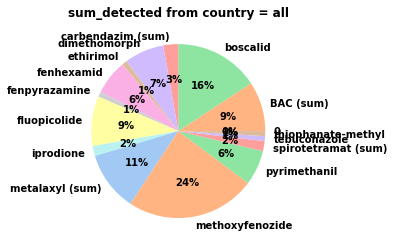

In [181]:



def plot_pie_by_chem(data_sql, country='USA', what_to_plot='sum_detected'):

    if country =='all':
        data_sql = data_sql.groupby('chem_name',as_index=False).sum()
        data = data_sql.loc[:,what_to_plot]
        labels = data_sql.loc[:,'chem_name']
    
    else:
        data = data_sql.loc[data_sql['country_of_origin']==country,what_to_plot]
        labels = data_sql.loc[data_sql['country_of_origin']==country,'chem_name']
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:len(labels)]

    plt.pie(data, labels=labels, colors = colors,
        autopct='%.0f%%', normalize=True);
    plt.title(what_to_plot + ' from country = ' + country  )




def plot_pie_by_chem2(data_sql, chemical_country='boscalid', what_to_plot='sum_detected',is_country=True):

    if is_country:
        label_plot ='country_of_origin'
        title_str = what_to_plot + ' by chemical = ' + chemical_country
        selective = 'chem_name'
    else:
        label_plot = 'chem_name'
        title_str = what_to_plot + ' from country = ' + chemical_country
        selective = 'country_of_origin'

    if chemical_country =='all':
        data_sql = data_sql.groupby(label_plot,as_index=False).sum()
        data = data_sql.loc[:,what_to_plot]
        labels = data_sql.loc[:,label_plot]
    
    else:
        data = data_sql.loc[data_sql[selective]==chemical_country,what_to_plot]
        labels = data_sql.loc[data_sql[selective]==chemical_country,label_plot]
    
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:len(labels)]

    plt.pie(data, labels=labels, colors = colors,
        autopct='%.0f%%', normalize=True);
    plt.title( title_str  )

# plot_pie_by_chem(data_sql,'USA','sum_detected'),
plot_pie_by_chem2(data_sql,'all','sum_detected',False)
# data_sql

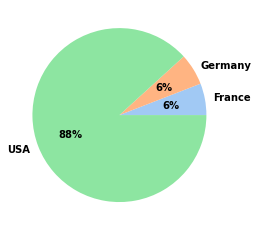

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

data = data_sql.loc[data_sql['chem_name']=='boscalid','sum_detected']
labels = data_sql.loc[data_sql['chem_name']=='boscalid','country_of_origin']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:len(labels)]

plt.pie(data, labels=labels, colors = colors,
    autopct='%.0f%%', normalize=True);

